## KModes

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from kmodes.kmodes import KModes


In [3]:
plt.rcParams.update(plt.rcParamsDefault)

In [4]:
df = pd.read_csv("ridotto.csv")
del df['ba-aug']
del df['pa-sep']
del df['age']

In [5]:
df.head()

,limit,sex,education,status,ps-sep,credit_default
0,50000,1,0,2,2,0
1,200000,1,3,0,-1,0
2,30000,0,1,0,2,0
3,140000,0,3,2,0,0
4,60000,0,1,0,1,1


In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:5].values)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:


km = KModes(init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X)

# Print the cluster centroids
print(km.cluster_centroids_)




Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2462, cost: 16867.0
Run 1, iteration: 2/100, moves: 0, cost: 16867.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 850, cost: 17472.0
Run 2, iteration: 2/100, moves: 0, cost: 17472.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2306, cost: 16418.0
Run 3, iteration: 2/100, moves: 0, cost: 16418.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 822, cost: 17331.0
Run 4, iteration: 2/100, moves: 0, cost: 17331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3641, cost: 17312.0
Run 5, iteration: 2/100, moves: 48, cost: 17312.0
Best run was number 3
[[0.24675325 1.         0.         0.         0.2       ]
 [0.22077922 0. 

In [8]:
df['Label'] = km.labels_
df.head()

,limit,sex,education,status,ps-sep,credit_default,Label
0,50000,1,0,2,2,0,3
1,200000,1,3,0,-1,0,0
2,30000,0,1,0,2,0,1
3,140000,0,3,2,0,0,7
4,60000,0,1,0,1,1,1


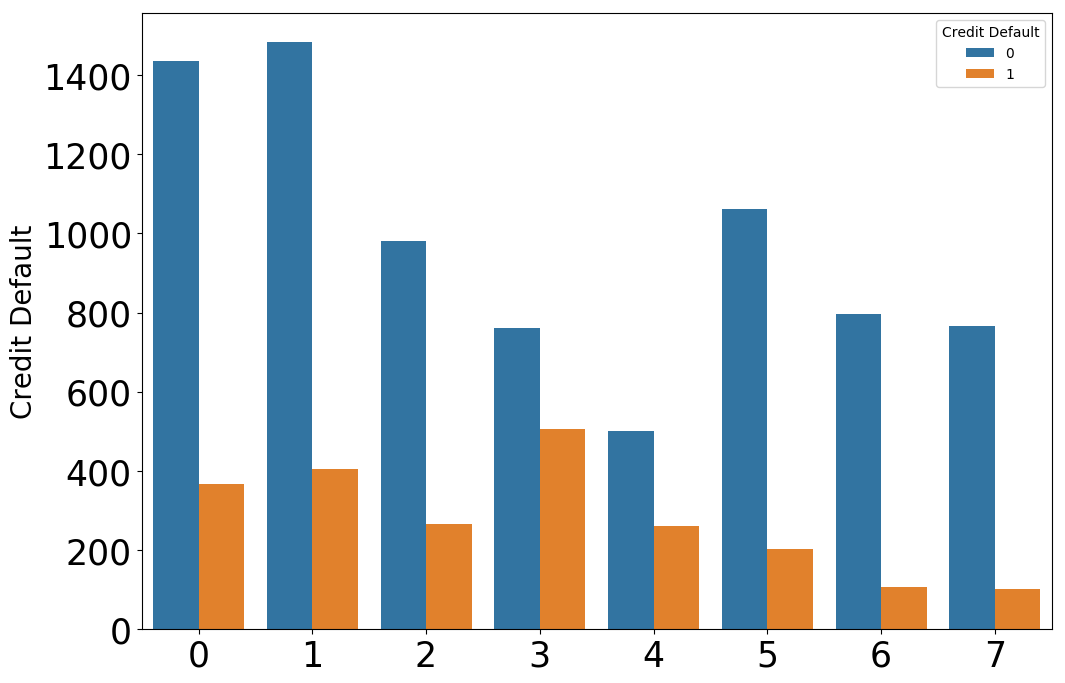

In [9]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df['Label'], hue=df['credit_default'])
plt.xticks(rotation=0)
b.set_xlabel("",fontsize=20)
b.set_ylabel("Credit Default",fontsize=20)
b.tick_params(labelsize=25)
b.legend_.set_title('Credit Default')


plt.tight_layout()
plt.show()




